# Importing libraries and data

In [1]:
# import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# set branding colours
light_blue = '#6fa5d2'
medium_blue = '#456785'
dark_blue = '#293748'

# set max_columns and max_colwidth to make it easier to see data in DataFrame
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 100

In [2]:
# import profiles.csv file as a DataFrame and explore columns
all_data = pd.read_csv("profiles.csv")
print(len(all_data))
print(all_data.columns.values)
all_data.head()

59946
['age' 'body_type' 'diet' 'drinks' 'drugs' 'education' 'essay0' 'essay1'
 'essay2' 'essay3' 'essay4' 'essay5' 'essay6' 'essay7' 'essay8' 'essay9'
 'ethnicity' 'height' 'income' 'job' 'last_online' 'location' 'offspring'
 'orientation' 'pets' 'religion' 'sex' 'sign' 'smokes' 'speaks' 'status']


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neithe...,"currently working as an international agent for a freight\nforwarding company. import, export, d...",making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexit...,"the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notic...","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), ...",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook rega...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor inv...,delicious porkness in all of its glories.<br />\nmy big ass doughboy's sinking into 15 new inche...,NaN,NaN,i am very open and will share just about anything.,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (poorly)",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public text on an online\ndating site makes me pleasantly u...","i make nerdy software for musicians, artists, and experimenters to\nindulge in their own weirdne...",improvising in different contexts. alternating between being\npresent and decidedly outside of a...,my large jaw and large glasses are the physical things people\ncomment on the most. when suffici...,"okay this is where the cultural matrix gets so specific, it's like\nbeing in the crosshairs.<br ...",movement<br />\nconversation<br />\ncreation<br />\ncontemplation<br />\ntouch<br />\nhumor,NaN,viewing. listening. dancing. talking. drinking. performing.,"when i was five years old, i was known as ""the boogerman"".","you are bright, open, intense, silly, ironic, critical, caring,\ngenerous, looking for an explor...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books according to the library\nof congress classification s...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, jarmusch, r.w. fassbender. . .<br />\ntwin peaks &a...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"hey how's it going? curre

# Processing and cleaning data for analysis

In [3]:
# drop columns that will not be used for project
columns_to_drop = [
    'ethnicity',
    'last_online',
    'location',
    'offspring',
    'orientation',
    'pets',
    'religion',
    'sign',
    'speaks',
    'essay0',
    'essay1',
    'essay2',
    'essay3',
    'essay4',
    'essay5',
    'essay6',
    'essay7',
    'essay8',
    'essay9',
    'sex'
]
all_data.drop(columns_to_drop, axis=1, inplace=True)
all_data.columns.values

array(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'height', 'income', 'job', 'smokes', 'status'], dtype=object)

In [4]:
# check which columns have NaN values
all_data.isna().any()

age          False
body_type     True
diet          True
drinks        True
drugs         True
education     True
height        True
income       False
job           True
smokes        True
status       False
dtype: bool

In [5]:
#remove NaNs in columns
other_columns_with_nan_values = [
    'body_type', 
    'diet', 
    'drinks', 
    'drugs', 
    'height', 
    'smokes',
    'education',
    'job'
]
all_data.dropna(subset=other_columns_with_nan_values, inplace=True)

In [6]:
# check that no columns have NaN values
all_data.isna().any()

# return length of data frame to see how many rows have been dropped
print(len(all_data))

22127


In [7]:
# determine value counts for status responses
all_data['status'].value_counts()

single            20846
available           603
seeing someone      577
married              99
unknown               2
Name: status, dtype: int64

In [8]:
# remove rows where response is "unknown"

all_data = all_data.loc[all_data['status'] != "unknown",:]

# map status responses to a number code

status_codes = {
    "single": 0,
    "available": 1,
    "seeing someone": 2,
    "married": 3,
}

all_data["status_code"] = all_data['status'].map(status_codes)

#check that mapping status responses has worked 

all_data['status_code'].value_counts()

0    20846
1      603
2      577
3       99
Name: status_code, dtype: int64

In [9]:
# determine value counts for income responses
all_data['income'].value_counts()

-1          16364
 20000       1583
 100000       785
 80000        548
 40000        522
 30000        516
 50000        452
 70000        352
 60000        340
 150000       308
 1000000      259
 250000        72
 500000        24
Name: income, dtype: int64

In [10]:
# determine value counts for education responses
all_data['education'].value_counts()

graduated from college/university    9417
graduated from masters program       3754
working on college/university        2577
graduated from two-year college       752
graduated from high school            707
working on masters program            651
graduated from ph.d program           544
working on two-year college           495
dropped out of college/university     458
graduated from law school             441
working on ph.d program               402
graduated from space camp             289
college/university                    265
dropped out of space camp             228
graduated from med school             212
working on space camp                 195
working on law school                 105
working on med school                  98
dropped out of two-year college        92
two-year college                       92
dropped out of masters program         64
dropped out of high school             59
dropped out of ph.d program            56
working on high school            

In [11]:
# map education responses to a number code

def map_education_to_code(education):
    if "graduated from college/university" in education:
        return 0
    elif "graduated from masters program" in education:
        return 1
    elif "graduated from high school" in education or "graduated from two-year college" in education:
        return 2
    else:
        return 3
    
all_data['education_code'] = all_data['education'].apply(map_education_to_code)

# check that mapping education responses has worked 

all_data['education_code'].value_counts()

0    9417
3    7495
1    3754
2    1459
Name: education_code, dtype: int64

In [12]:
# determine value counts for job responses
all_data['job'].value_counts()

other                                3169
student                              2284
science / tech / engineering         2142
computer / hardware / software       1956
sales / marketing / biz dev          1856
artistic / musical / writer          1850
medicine / health                    1573
education / academia                 1466
executive / management               1034
banking / financial / real estate     992
entertainment / media                 837
hospitality / travel                  589
law / legal services                  538
construction / craftsmanship          432
clerical / administrative             334
political / government                316
rather not say                        193
transportation                        162
retired                               153
unemployed                            143
military                              106
Name: job, dtype: int64

In [13]:
# remove rows where response is "other"

all_data = all_data.loc[all_data['job'] != "other",:]

# map job responses to a number code

def map_job_to_code(job):
    if 'student' in job:
        return 0
    elif "science / tech / engineering" in job:
        return 1
    elif "computer / hardware / software" in job:
        return 2
    elif "sales / marketing / biz dev" in job:
        return 3
    elif "artistic / musical / writer" in job:
        return 4
    elif "medicine / health " in job:
        return 5
    elif "education / academia" in job:
        return 6
    elif "executive / management" in job:
        return 7
    elif "banking / financial / real estate" in job or "entertainment / media" in job:
        return 8
    else:
        return 9
    
all_data['job_code'] = all_data['job'].apply(map_job_to_code)

# check that mapping job responses has worked 

all_data['job_code'].value_counts()

9    4539
0    2284
1    2142
2    1956
3    1856
4    1850
8    1829
6    1466
7    1034
Name: job_code, dtype: int64

In [14]:
# determine value counts for diet responses
all_data['diet'].value_counts()

mostly anything        9465
anything               3152
strictly anything      2534
mostly vegetarian      1742
mostly other            522
strictly vegetarian     469
vegetarian              255
strictly other          222
other                   167
mostly vegan            158
strictly vegan          114
mostly kosher            54
vegan                    52
mostly halal             22
strictly kosher          12
strictly halal            9
kosher                    4
halal                     3
Name: diet, dtype: int64

In [15]:
# map diet responses to a number code

def map_diet_to_code(diet):
    if "vegan" in diet:
        return 0
    elif "vegetarian" in diet:
        return 1
    elif "kosher" in diet or "halal" in diet:
        return 2
    else:
        return 3
    
all_data['diet_code'] = all_data['diet'].apply(map_diet_to_code)

# check that mapping diet responses has worked 

all_data['diet_code'].value_counts()

3    16062
1     2466
0      324
2      104
Name: diet_code, dtype: int64

In [16]:
# determine value counts for drinks responses
all_data['drinks'].value_counts()

socially       13675
rarely          2140
often           1564
not at all      1277
very often       178
desperately      122
Name: drinks, dtype: int64

In [17]:
# map drinks responses to a number code

drinks_codes = {
    "not at all": 0,
    "rarely": 1,
    "socially": 2,
    "often": 3,
    "very often": 4,
    "desperately": 5
}

all_data["drinks_code"] = all_data['drinks'].map(drinks_codes)

#check that mapping drinks responses has worked 

all_data['drinks_code'].value_counts()

2    13675
1     2140
3     1564
0     1277
4      178
5      122
Name: drinks_code, dtype: int64

In [18]:
#determine value counts for drugs responses
all_data['drugs'].value_counts()

never        15457
sometimes     3309
often          190
Name: drugs, dtype: int64

In [19]:
# map drugs responses to a number code

drugs_codes = {
    "never": 0,
    "sometimes": 1,
    "often": 2
}

all_data["drugs_code"] = all_data['drugs'].map(drugs_codes)

#check that mapping drugs responses has worked 

all_data['drugs_code'].value_counts()

0    15457
1     3309
2      190
Name: drugs_code, dtype: int64

In [20]:
# determine value counts for smokes responses
all_data['smokes'].value_counts()

no                15589
sometimes          1182
when drinking      1056
yes                 666
trying to quit      463
Name: smokes, dtype: int64

In [21]:
# map smokes responses to a number code

smokes_codes = {
    "no": 0,
    "when drinking": 1,
    "sometimes": 2,
    "yes": 3,
    "trying to quit": 3
}

all_data["smokes_code"] = all_data['smokes'].map(smokes_codes)

#check that mapping smokes responses has worked 

all_data['smokes_code'].value_counts()

0    15589
2     1182
3     1129
1     1056
Name: smokes_code, dtype: int64

In [22]:
# determine value counts for body type responses
all_data['body_type'].value_counts()

average           5001
fit               4465
athletic          4137
thin              1634
curvy             1333
a little extra     994
skinny             568
full figured       332
overweight         172
jacked             144
used up            129
rather not say      47
Name: body_type, dtype: int64

In [23]:
# remove rows where response is "rather not say"

all_data = all_data.loc[all_data['body_type'] != "rather not say",:]

# map body_type responses to a number code

body_type_codes = {
    "average": 0,
    "fit": 1,
    "athletic": 2,
    "thin": 3,
    "curvy": 4,
    "a little extra": 5,
    "skinny": 6,
    "full figured": 7,
    "overweight": 8,
    "jacked": 9,
    "used up": 10
}

all_data["body_type_code"] = all_data['body_type'].map(body_type_codes)

#check that mapping smokes responses has worked 

all_data['body_type_code'].value_counts()

0     5001
1     4465
2     4137
3     1634
4     1333
5      994
6      568
7      332
8      172
9      144
10     129
Name: body_type_code, dtype: int64

In [24]:
# return length of data frame to see how many responses will be used for analysis
print(len(all_data))

18909


# Exploring the cleaned and processed data

student                              2275
science / tech / engineering         2140
computer / hardware / software       1953
sales / marketing / biz dev          1852
artistic / musical / writer          1845
medicine / health                    1568
education / academia                 1463
executive / management               1032
banking / financial / real estate     990
entertainment / media                 836
hospitality / travel                  588
law / legal services                  538
construction / craftsmanship          431
clerical / administrative             334
political / government                314
rather not say                        187
transportation                        162
retired                               153
unemployed                            142
military                              106
dtype: int64


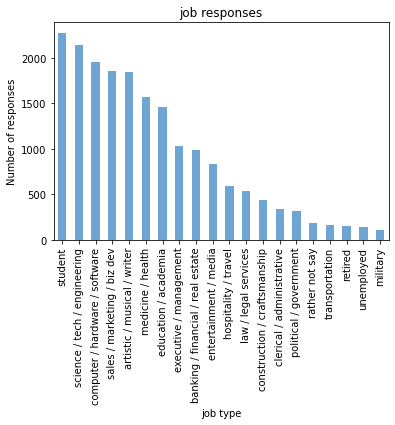

In [25]:
#generate bar chart for job responses

job_responses = pd.value_counts(all_data['job'].values, sort=True)
print(job_responses)
ax = job_responses.plot(kind='bar', title='job responses', color=light_blue)
ax.set(xlabel='job type', ylabel='Number of responses')
plt.show()

average           5001
fit               4465
athletic          4137
thin              1634
curvy             1333
a little extra     994
skinny             568
full figured       332
overweight         172
jacked             144
used up            129
dtype: int64


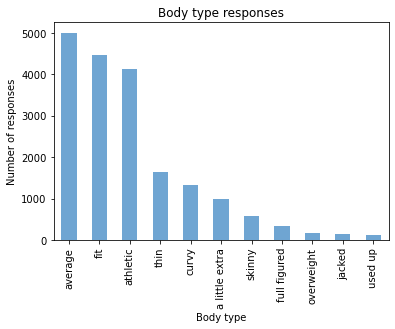

In [26]:
#generate bar chart for body type responses

body_type_responses = pd.value_counts(all_data['body_type'].values, sort=True)
print(body_type_responses)
ax = body_type_responses.plot(kind='bar', title='Body type responses', color=light_blue)
ax.set(xlabel='Body type', ylabel='Number of responses')
plt.show()

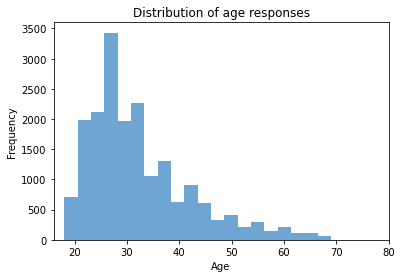

In [27]:
#generate histogram chart for age responses

plt.hist(all_data['age'], color=light_blue, bins=20)
plt.title("Distribution of age responses")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

In [28]:
all_data.corr()

,age,height,income,status_code,education_code,job_code,diet_code,drinks_code,drugs_code,smokes_code,body_type_code
age,1.000000,-0.047480,-0.006404,-0.033644,-0.152014,0.258408,-0.047732,-0.103631,-0.158502,-0.147184,-0.040378
height,-0.047480,1.000000,0.055141,-0.003050,0.010076,-0.078017,0.062693,0.039417,0.075735,0.063683,-0.049667
income,-0.006404,0.055141,1.000000,0.011454,0.034375,0.014618,0.005225,0.058774,0.094346,0.063767,0.061820
status_code,-0.033644,-0.003050,0.011454,1.000000,0.020299,-0.037577,-0.049781,-0.009097,0.087827,0.021298,0.048560
education_code,-0.152014,0.010076,0.034375,0.020299,1.000000,-0.098225,-0.022336,-0.035548,0.071731,0.139722,0.064936
job_code,0.258408,-0.078017,0.014618,-0.037577,-0.098225,1.000000,0.004033,0.000786,-0.042315,0.001645,0.025859
diet_code,-0.047732,0.062693,0.005225,-0.049781,-0.022336,0.004033,1.000000,0.069500,-0.055578,0.020089,-0.004899
drinks_code,-0.103631,0.039417,0.058774,-0.009097,-0.035548,0.000786,0.069500,1.000000,0.213638,0.136777,0.032024
drugs_code,-0.158502,0.075735,0.094346,0.087827,0.071731,-0.042315,-0.055578,0.213638,1.000000,0.347923,0.086070
smokes_code,-0.147184,0.063683,0.063767,0.021298,0.139722,0.001645,0.020089,0.136777,0.347923,1.000000,0.085562


# Question 1: Can we use diet, lifestyle information (job, drinks, drug use, smoke, status), and education to predict age?

## Prepare data for analysis - scale features and generate training and test data sets

In [29]:
# select features and scale data for regression

from sklearn.preprocessing import scale

list_of_features_for_analysis = [
    'diet_code',
    'drinks_code',
    'drugs_code',
    'smokes_code',
    'body_type_code',
    'status_code',
    'education_code',
    'job_code'
]
features = all_data[list_of_features_for_analysis]
scaled_features = scale(features, axis=0)
age = all_data['age']

In [30]:
# generate training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, age, test_size=0.2, random_state=25)

## Use Multiple Linear regression 

MLR training set score: 0.11939469192784613
MLR test set score: 0.11515143963557839


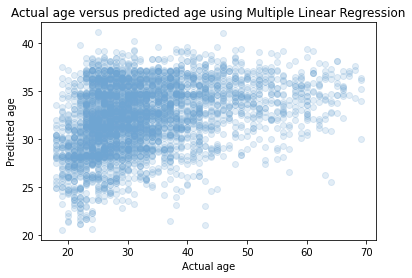

In [31]:
# build Multiple Linear Regression model to predict age

from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()

mlr_model.fit(X_train, y_train)

mlr_training_score = mlr_model.score(X_train, y_train)

print("MLR training set score: %s" %(mlr_training_score))

mlr_test_score = mlr_model.score(X_test, y_test)

print("MLR test set score: %s" %(mlr_test_score))

#generate plot showing difference between predicted age and actual age using Multiple Linear Regression model

mlr_predictions = mlr_model.predict(X_test)

plt.scatter(y_test, mlr_predictions, c=light_blue, alpha=0.2)
plt.title("Actual age versus predicted age using Multiple Linear Regression")
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.show()

## Use K Neighbors regression 

KNR training set score: 0.41252909924733716
KNR test set score: 0.0805804771883416


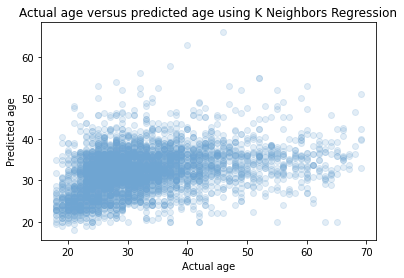

In [32]:
#build K Neighbors Regressor to predict age

from sklearn.neighbors import KNeighborsRegressor

kn_regressor = KNeighborsRegressor(n_neighbors = 50, weights = "distance")
kn_regressor.fit(X_train, y_train)

knr_training_score = kn_regressor.score(X_train, y_train)

print("KNR training set score: %s" %(knr_training_score))

knr_test_score = kn_regressor.score(X_test, y_test)

print("KNR test set score: %s" %(knr_test_score))

#generate plot showing difference between predicted age and actual age using K Neighbors Regressor

knr_predictions = kn_regressor.predict(X_test)

plt.scatter(y_test, knr_predictions, c=light_blue, alpha=0.2)
plt.title("Actual age versus predicted age using K Neighbors Regression")
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.show()

# Question 2: Can we use diet, lifestyle information (drinks, drug , smoke, status, job), and age to predict education type? 

## Prepare data for analysis - scale features and generate training and test data sets 

In [33]:
# select features and scale data for regression

from sklearn.preprocessing import scale

list_of_features_classification = [
    'diet_code',
    'drinks_code',
    'drugs_code',
    'smokes_code',
    'age',
    'status_code',
    'job_code'
]
features_classification = all_data[list_of_features_classification]
scaled_features_classification = scale(features_classification, axis=0)
labels = all_data['education_code']

In [34]:
# generate training and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_features_classification, labels, test_size=0.2, random_state=40)

## Use K Nearest Neighbours classification 

In [35]:
# build K Nearest Neighbors model to predict body type

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=90)
knn_classifier.fit(train_data, train_labels)

knn_training_score = knn_classifier.score(train_data, train_labels)

print("KNN training set score: %s" %(knn_training_score))

knn_test_score = knn_classifier.score(test_data, test_labels)

print("KNN test set score: %s" %(knn_test_score))

KNN training set score: 0.5352019567660474
KNN test set score: 0.5354309888947647


In [36]:
# generate classification report and confusion matrix for K Nearest Neighbors classifier

from sklearn.metrics import classification_report, confusion_matrix 

knn_predictions = knn_classifier.predict(test_data)
print(confusion_matrix(test_labels, knn_predictions))
print(classification_report(test_labels, knn_predictions))

[[1334   63    0  259]
 [ 483   76    1   83]
 [ 133    7    1   78]
 [ 604   45    1  614]]
              precision    recall  f1-score   support

           0       0.52      0.81      0.63      1656
           1       0.40      0.12      0.18       643
           2       0.33      0.00      0.01       219
           3       0.59      0.49      0.53      1264

    accuracy                           0.54      3782
   macro avg       0.46      0.35      0.34      3782
weighted avg       0.51      0.54      0.49      3782



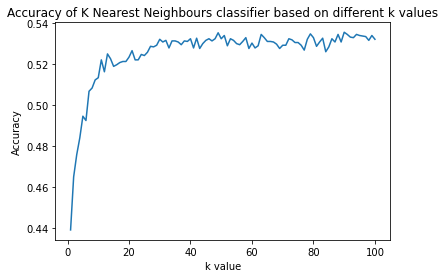

{'k': 90, 'score': 0.5354309888947647}


In [37]:
# generate plot showing K Nearest Neighbors classifier score based on different n_neighbors values 
# and print out n_neighbors value that results in highest score

scores = []

highest_score = {
    'k': 0,
    'score': 0
}

for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    score = classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'k': k,
            'score': score
        }

x_values = range(1, 101)

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of K Nearest Neighbours classifier based on different k values')
plt.ylabel('Accuracy')
plt.xlabel('k value')
plt.show()
print(highest_score)

## Use Support Vector Machines classification 

In [38]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel='rbf', gamma=0.4)
svc_classifier.fit(train_data, train_labels)

svc_training_score = svc_classifier.score(train_data, train_labels)

print("SVC training set score: %s" %(svc_training_score))

svc_test_score = classifier.score(test_data, test_labels)

print("SVC test set score: %s" %(svc_test_score))

SVC training set score: 0.5515303761486084
SVC test set score: 0.5319936541512428


In [39]:
# generate classification report and confusion matrix for Support Vector Machines classifier

from sklearn.metrics import classification_report, confusion_matrix 

svc_predictions = svc_classifier.predict(test_data)
print(confusion_matrix(test_labels, svc_predictions))
print(classification_report(test_labels, svc_predictions))

[[1447   16    4  189]
 [ 571   13    1   58]
 [ 144    3    2   70]
 [ 687   17    3  557]]
              precision    recall  f1-score   support

           0       0.51      0.87      0.64      1656
           1       0.27      0.02      0.04       643
           2       0.20      0.01      0.02       219
           3       0.64      0.44      0.52      1264

    accuracy                           0.53      3782
   macro avg       0.40      0.34      0.30      3782
weighted avg       0.49      0.53      0.46      3782



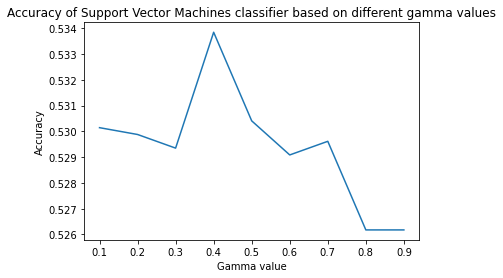

{'gamma': 0.4, 'score': 0.5338445267054469}


In [40]:
# generate plot showing SVC Classifier score based on different gamma values 
# and print out gamma value that results in highest score

scores = []

highest_score = {
    'gamma': 0,
    'score': 0
}

gamma_values = np.arange(0.1, 1.0, 0.1)

for val in gamma_values:
    svc_classifier = SVC(kernel='rbf', gamma=val)
    svc_classifier.fit(train_data, train_labels)
    score = svc_classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'gamma': val,
            'score': score
        }

x_values = gamma_values

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of Support Vector Machines classifier based on different gamma values')
plt.ylabel('Accuracy')
plt.xlabel('Gamma value')
plt.show()
print(highest_score)